In [1]:
%reload_ext autoreload
%autoreload 2

In [5]:
import os
import sys
import time

import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

sys.path.append(os.path.join(os.environ['REPO_DIR'], 'utilities'))
from utilities2015 import *
from metadata import *
from data_manager import *
from learning_utilities import *

In [6]:
stack = 'DmaleAxioscan'

In [7]:
data_dir = '/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_lossless/'
tb_dir = '/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail/'

In [8]:
filenames = [fp.split('.')[0][:-10] for fp in os.listdir(tb_dir)]

# Generate masks

In [40]:
for fn in filenames:
    
    mask_fp = DataManager.get_thumbnail_mask_filename_v3(stack=stack, prep_id=0, fn=fn)
    create_parent_dir_if_not_exists(mask_fp)
    
    tb = imread(os.path.join(tb_dir, fp))
    tb_mask = img_as_ubyte(tb < 255)
    imsave(mask_fp, tb_mask)
    upload_to_s3(mask_fp)

aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide21_2018_02_02-S1_prep0_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide21_2018_02_02-S1_prep0_thumbnail_mask.png"
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide21_2018_02_02-S2_prep0_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide21_2018_02_02-S2_prep0_thumbnail_mask.png"
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide21_2018_02_02-S3_prep0_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide21_2018_02_02-S3_prep0_thumbnail_mask.png"
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_process

# Cropbox

In [20]:
cropbox = {
'Dmale_slide21_2018_02_02-S1': [848, 45, 889, 804],
'Dmale_slide21_2018_02_02-S2': [809, 69, 905, 825],
'Dmale_slide21_2018_02_02-S3': [833,19,911,831],
'Dmale_slide23_2018_02_02-S1': [848,149,945,702],
'Dmale_slide23_2018_02_02-S2': [866,154,941,725],
'Dmale_slide23_2018_02_02-S3': [858,112,950,742],
'Dmale_slide25_2018_02_02-S1': [978,186,984,744],
'Dmale_slide25_2018_02_02-S2': [958,161,1004,765],
'Dmale_slide25_2018_02_02-S3': [999,176,1033,792],
'Dmale_slide27_2018_02_02-S1': [994,164,1096,796],
'Dmale_slide27_2018_02_02-S2': [1004,160,1106,810],
'Dmale_slide27_2018_02_02-S3': [1016,192,1104,806],
'Dmale_slide29_2018_02_02-S1': [1040,116,1051,798],
'Dmale_slide29_2018_02_02-S2': [997,126,1038,790],
'Dmale_slide29_2018_02_02-S3': [998,106,1030,816],
'Dmale_slide31_2018_02_02-S1': [1029,143,996,785],
'Dmale_slide31_2018_02_02-S2': [1028,131,1021,811],
'Dmale_slide31_2018_02_02-S3': [1045,154,1027,804]
}

In [37]:
# Crop lossless

for fn in filenames:
    
    x,y,w,h = cropbox[fn]
    input_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=0, fn=fn)
    output_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=6, fn=fn)
    create_parent_dir_if_not_exists(output_fp)
    
    scale_factor = 32
    background_color = 'white'

    cmd = "convert \"%(input_fp)s\" -virtual-pixel background -background %(bg_color)s -crop %(w)sx%(h)s%(x)s%(y)s\! -flatten -compress lzw \"%(output_fp)s\"" % \
    {'input_fp': input_fp,
     'output_fp': output_fp,
     'x': '+' + str(x * scale_factor) if int(x) >= 0 else str(x * scale_factor),
     'y': '+' + str(y * scale_factor) if int(y) >= 0 else str(y * scale_factor),
     'w': str(w * scale_factor),
     'h': str(h * scale_factor),
     'bg_color': background_color}
    
    execute_command(cmd)
    upload_to_s3(output_fp)

convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_lossless/Dmale_slide21_2018_02_02-S1_prep0_lossless.tif" -virtual-pixel background -background white -crop 28448x25728+27136+1440\! -flatten -compress lzw "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless/Dmale_slide21_2018_02_02-S1_prep6_lossless.tif"
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_lossless/Dmale_slide21_2018_02_02-S2_prep0_lossless.tif" -virtual-pixel background -background white -crop 28960x26400+25888+2208\! -flatten -compress lzw "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless/Dmale_slide21_2018_02_02-S2_prep6_lossless.tif"
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_lossless/Dmale_slide21_2018_02_02-S3_prep0_lossless.tif" -virtual-pixel background -background white -crop 29152x26592+26656+60

In [41]:
# Crop masks

for fn in filenames:
    
    x,y,w,h = cropbox[fn]
    input_fp = DataManager.get_thumbnail_mask_filename_v3(stack=stack, prep_id=0, fn=fn)
    output_fp = DataManager.get_thumbnail_mask_filename_v3(stack=stack, prep_id=6, fn=fn)
    create_parent_dir_if_not_exists(output_fp)
    
    scale_factor = 1
    background_color = 'white'

    cmd = "convert \"%(input_fp)s\" -virtual-pixel background -background %(bg_color)s -crop %(w)sx%(h)s%(x)s%(y)s\! -flatten -compress lzw \"%(output_fp)s\"" % \
    {'input_fp': input_fp,
     'output_fp': output_fp,
     'x': '+' + str(x * scale_factor) if int(x) >= 0 else str(x * scale_factor),
     'y': '+' + str(y * scale_factor) if int(y) >= 0 else str(y * scale_factor),
     'w': str(w * scale_factor),
     'h': str(h * scale_factor),
     'bg_color': background_color}
    
    execute_command(cmd)
    upload_to_s3(output_fp)

convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide21_2018_02_02-S1_prep0_thumbnail_mask.png" -virtual-pixel background -background white -crop 889x804+848+45\! -flatten -compress lzw "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_thumbnail_mask/Dmale_slide21_2018_02_02-S1_prep6_thumbnail_mask.png"
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_thumbnail_mask/Dmale_slide21_2018_02_02-S1_prep6_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_thumbnail_mask/Dmale_slide21_2018_02_02-S1_prep6_thumbnail_mask.png"
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide21_2018_02_02-S2_prep0_thumbnail_mask.png" -virtual-pixel background -background white -crop 905x825+809+69\! -flatten -compress lzw "/media/yuncong/BstemAtlasDa

convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide29_2018_02_02-S1_prep0_thumbnail_mask.png" -virtual-pixel background -background white -crop 1051x798+1040+116\! -flatten -compress lzw "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_thumbnail_mask/Dmale_slide29_2018_02_02-S1_prep6_thumbnail_mask.png"
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_thumbnail_mask/Dmale_slide29_2018_02_02-S1_prep6_thumbnail_mask.png" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_thumbnail_mask/Dmale_slide29_2018_02_02-S1_prep6_thumbnail_mask.png"
convert "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep0_thumbnail_mask/Dmale_slide29_2018_02_02-S2_prep0_thumbnail_mask.png" -virtual-pixel background -background white -crop 1038x790+997+126\! -flatten -compress lzw "/media/yuncong/BstemAt

# Convert to grayJpeg

In [47]:
for fn in filenames:
    
    input_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=6, fn=fn)
    output_fp = DataManager.get_image_filepath_v2(stack=stack, prep_id=6, fn=fn, version='grayJpeg')
    create_parent_dir_if_not_exists(output_fp)

    cmd = 'convert %(in_fp)s colorspace Gray -separate -average %(out_fp)s' % \
    {'in_fp':input_fp, 'out_fp':output_fp}
     
    execute_command(cmd)
    upload_to_s3(output_fp)

convert /media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless/Dmale_slide21_2018_02_02-S1_prep6_lossless.tif colorspace Gray -separate -average /media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless_grayJpeg/Dmale_slide21_2018_02_02-S1_prep6_lossless_grayJpeg.jpg
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless_grayJpeg/Dmale_slide21_2018_02_02-S1_prep6_lossless_grayJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless_grayJpeg/Dmale_slide21_2018_02_02-S1_prep6_lossless_grayJpeg.jpg"
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless/Dmale_slide21_2018_02_02-S2_prep6_lossless.tif colorspace Gray -separate -average /media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless_grayJpeg/Dmale_slide21_2018_02_02-S2_prep6_lossless_grayJ

aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless_grayJpeg/Dmale_slide29_2018_02_02-S1_prep6_lossless_grayJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless_grayJpeg/Dmale_slide29_2018_02_02-S1_prep6_lossless_grayJpeg.jpg"
convert /media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless/Dmale_slide29_2018_02_02-S2_prep6_lossless.tif colorspace Gray -separate -average /media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless_grayJpeg/Dmale_slide29_2018_02_02-S2_prep6_lossless_grayJpeg.jpg
aws s3 cp "/media/yuncong/BstemAtlasData/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless_grayJpeg/Dmale_slide29_2018_02_02-S2_prep6_lossless_grayJpeg.jpg" "s3://mousebrainatlas-data/CSHL_data_processed/DmaleAxioscan/DmaleAxioscan_prep6_lossless_grayJpeg/Dmale_slide29_2018_02_02-S2_prep6_lossless_grayJpeg.jpg"
convert

# Generate scoremap

In [9]:
def draw_scoremap(clfs, scheme, stack, win_id, prep_id=2, 
                  bbox=None,
                  sec=None, fn=None, bg_img=None,
                  bg_img_local_region=None, return_scoremap=False, 
                  out_resolution_um=None, in_resolution_um=None,
                  feature='cnn', 
                  model=None, mean_img=None, model_name=None,
                  batch_size=None
                 ):
    """
    Generate the scoremap for a given region.
    
    Args:
        clfs: sklearn classifiers
        scheme (str): normalization scheme
        win_id (int): windowing id, determines patch size and spacing.
        prep_id (int): the prep_id the `bbox` corresponds to. Default to 2.
        bbox (4-tuple): (xmin, xmax, ymin, ymax) in raw resolution. If not given, use the whole image.
        bg_img: background image.
        bg_img_local_region: the part of background image in bbox.
        return_scoremap (bool): If True, return (viz, scoremap); otherwise, return viz.
        out_resolution_um (float): resolution of output scoremap in microns
        feature (str): cnn or mean
        model_name (str): model name. For forming filename of saved features.
        
    Returns:
        (2d-array of uint8): scoremap overlayed on image.
        (2d-array of float): scoremap array, optional
    """
    
    # structures = [convert_to_original_name(structure)]
    
    if bbox is None:
        roi_xmin = 0
        roi_ymin = 0
#         roi_w, roi_h = metadata_cache['image_shape'][stack]
    else:
        roi_xmin, roi_xmax, roi_ymin, roi_ymax = bbox
        roi_w = roi_xmax + 1 - roi_xmin
        roi_h = roi_ymax + 1 - roi_ymin
    
    if fn is None:
        fn = metadata_cache['sections_to_filenames'][stack][sec]
        
    ##########################################################################################
        
    t = time.time()
    mask_tb = DataManager.load_thumbnail_mask_v3(stack=stack, prep_id=prep_id, fn=fn)
    
    if bbox is None:    
        roi_h = mask_tb.shape[0] * 32
        roi_w = mask_tb.shape[1] * 32
        
    grid_spec = win_id_to_gridspec(win_id=win_id, stack=stack, image_shape=(roi_w, roi_h))
    indices_roi = locate_patches_v2(grid_spec=grid_spec, mask_tb=mask_tb, 
                                    bbox_lossless=(roi_xmin, roi_ymin, roi_w, roi_h))
    sys.stderr.write('locate patches: %.2f seconds\n' % (time.time() - t))       
    
    sample_locations_roi = grid_parameters_to_sample_locations(grid_spec=grid_spec)[indices_roi]
    
#     try:
#         t = time.time()
        
#         assert feature == 'cnn'
        
#         features, locations = DataManager.load_dnn_features_v2(stack=stack, sec=sec, fn=fn,
#                                                     prep_id=2,
#                                                     win_id=win_id, 
#                               normalization_scheme=scheme,
#                                              model_name=model_name)
        
#         location_to_index = {tuple(loc): idx for idx, loc in enumerate(locations)}
#         indices_roi = [location_to_index[tuple(loc)] for loc in sample_locations_roi]
#         features = features[indices_roi]
        
#         sys.stderr.write('Load pre-computed features: %.2f seconds\n' % (time.time() - t))
        
#     except Exception as e:
        
#     sys.stderr.write('%s\nNo pre-computed features found... computing from scratch.\n' % str(e))

    t = time.time()

    test_patches = extract_patches_given_locations(stack=stack, sec=sec, fn=fn,
                                                   prep_id=prep_id,
                                                   locs=sample_locations_roi, 
                                                   patch_size=grid_spec[0], 
                                                   normalization_scheme=scheme,
                                                  is_nissl=True)

    # Resize the patches to 224 x 224 as required by CNN.
    if test_patches[0].shape != (224,224):
        sys.stderr.write('Resize patches from %d x %d to 224 x 224.\n' % test_patches[0].shape)
        test_patches = [img_as_ubyte(resize(p, (224, 224))) for p in test_patches]

    sys.stderr.write('Extract patches: %.2f seconds\n' % (time.time() - t))
#     display_images_in_grids(test_patches[::1000], nc=5, cmap=plt.cm.gray)

    t = time.time()
    if feature == 'mean':
        features = np.array([[p.mean()] for p in test_patches])
    elif feature == 'cnn':
        features = convert_image_patches_to_features_v2(test_patches, model=model, 
                                             mean_img=mean_img, 
                                             batch_size=batch_size)
    else:
        raise
    sys.stderr.write('Compute features: %.2f seconds\n' % (time.time() - t))

#         t = time.time()
#         DataManager.save_dnn_features_v2(features=features, locations=sample_locations_roi, 
#                                          stack=stack, sec=sec, fn=fn,
#                                          win_id=win_id, normalization_scheme=scheme,
#                                          model_name=model_name)
#         sys.stderr.write('Save features: %.2f seconds\n' % (time.time() - t))

        
    scoremap_viz_all_clfs = {}
    scoremap_local_region_all_clfs = {}

    t = time.time()
    if bg_img_local_region is None:    
        if bg_img is None:
            if stack == 'ChatCryoJane201710':
                bg_img = DataManager.load_image_v2(stack=stack, prep_id=prep_id, version='NtbJpeg', fn=fn)
            else:
                bg_img = DataManager.load_image_v2(stack=stack, prep_id=prep_id, version='grayJpeg', fn=fn)
        bg_img_local_region = bg_img[roi_ymin:(roi_ymin+roi_h), roi_xmin:(roi_xmin+roi_w)]
    sys.stderr.write('Load background image: %.2f seconds\n' % (time.time() - t))
    
    if in_resolution_um is None:
        in_resolution_um = planar_resolution[stack]
    else:
        assert in_resolution_um == planar_resolution[stack]
    out_downscale = out_resolution_um / in_resolution_um
        
    t = time.time()
    bg_img_local_region_at_out_downscale = rescale(bg_img_local_region, 1./out_downscale)
    sys.stderr.write('Rescale background image to output resolution: %.2f seconds\n' % (time.time() - t))
    
    for name, clf in clfs.iteritems():
        
        t = time.time()
        sparse_scores = clf.predict_proba(features)[:,1]
        sys.stderr.write('Predict scores %s: %.2f seconds\n' % (name, time.time() - t))

        t = time.time()
        scoremap = resample_scoremap(sparse_scores, sample_locations_roi, 
                                     gridspec=grid_spec,
                                     downscale=out_downscale)
        sys.stderr.write('Rescample scoremap %s: %.2f seconds\n' % (name, time.time() - t))

        scoremap_local_region = scoremap[int(np.round(roi_ymin/out_downscale)):int(np.round((roi_ymin+roi_h)/out_downscale)), 
                                         int(np.round(roi_xmin/out_downscale)):int(np.round((roi_xmin+roi_w)/out_downscale))]
        
        t = time.time()
        scoremap_viz = scoremap_overlay_on(bg=bg_img_local_region_at_out_downscale, 
                                           stack=stack,
                                           out_downscale=out_downscale, 
                                           in_downscale=out_downscale,  
                                           fn=fn, 
                                           scoremap=scoremap_local_region,
                                          in_scoremap_downscale=out_downscale,
                                          cmap_name= 'jet')
        sys.stderr.write('Genearte scoremap overlay image %s: %.2f seconds\n' % (name, time.time() - t))
        
        scoremap_viz_all_clfs[name] = scoremap_viz
        scoremap_local_region_all_clfs[name] = scoremap_local_region
        
    if return_scoremap:
        return scoremap_viz_all_clfs, scoremap_local_region_all_clfs
    else:
        return scoremap_viz_all_clfs

In [10]:
batch_size = 256
model_dir_name = 'inception-bn-blue'
model_name = 'inception-bn-blue'
model, mean_img = load_mxnet_model(model_dir_name=model_dir_name, model_name=model_name, 
                                   num_gpus=1, batch_size=batch_size)

/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:53: UserWarning: You created Module with Module(..., label_names=['softmax_label']) but input with name 'softmax_label' is not found in symbol.list_arguments(). Did you mean one of:
	data
  warnings.warn(msg)
/usr/local/lib/python2.7/dist-packages/mxnet/module/base_module.py:65: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


In [30]:
clfs = DataManager.load_classifiers(classifier_id=999)
# clfs = {'7N': clfs['7N']}

In [12]:
out_resolution_um = 10.

In [32]:
for fn in ['Dmale_slide31_2018_02_02-S1']:
# for fn in ['MD589-IHC33-2015.07.30-23.34.35_MD589_2_0098']:

    viz_all_landmarks, scoremap_all_landmarks = draw_scoremap(clfs=clfs, 
#                             scheme='normalize_mu_region_sigma_wholeImage_(-1,5)', 
                            scheme='none', 
                            win_id=7,
                                                              prep_id=6,
                            stack=stack, return_scoremap=True, fn=fn,
                            model=model, model_name=model_name,
                             mean_img=mean_img, 
                             batch_size=batch_size,
                           out_resolution_um=out_resolution_um)

locate patches: 0.06 seconds
Not using image_cache.
Load image: 24.59 seconds.
Resize patches from 316 x 316 to 224 x 224.
Extract patches: 294.72 seconds


(80000, 1, 224, 224)
(6533, 1, 224, 224)


Compute features: 138.27 seconds
Not using image_cache.
Load background image: 5.65 seconds
Rescale background image to output resolution: 9.28 seconds
Predict scores Tz: 0.40 seconds
Rescample scoremap Tz: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image Tz: 0.34 seconds


(816, 1036, 3) (816, 1036)


Predict scores VCA: 0.40 seconds
Rescample scoremap VCA: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image VCA: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores 7n: 0.40 seconds
Rescample scoremap 7n: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image 7n: 0.29 seconds


(816, 1036, 3) (816, 1036)


Predict scores DC: 0.40 seconds
Rescample scoremap DC: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image DC: 0.34 seconds


(816, 1036, 3) (816, 1036)


Predict scores 5N: 0.40 seconds
Rescample scoremap 5N: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image 5N: 0.34 seconds


(816, 1036, 3) (816, 1036)


Predict scores 3N: 0.40 seconds
Rescample scoremap 3N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image 3N: 0.31 seconds


(816, 1036, 3) (816, 1036)


Predict scores Pn: 0.40 seconds
Rescample scoremap Pn: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image Pn: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores 10N: 0.40 seconds
Rescample scoremap 10N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image 10N: 0.34 seconds


(816, 1036, 3) (816, 1036)


Predict scores LC: 0.40 seconds
Rescample scoremap LC: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image LC: 0.29 seconds


(816, 1036, 3) (816, 1036)


Predict scores 7N: 0.39 seconds
Rescample scoremap 7N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image 7N: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores Amb: 0.39 seconds
Rescample scoremap Amb: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image Amb: 0.34 seconds


(816, 1036, 3) (816, 1036)


Predict scores 12N: 0.43 seconds
Rescample scoremap 12N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image 12N: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores RMC: 0.48 seconds
Rescample scoremap RMC: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image RMC: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores Sp5O: 0.40 seconds
Rescample scoremap Sp5O: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image Sp5O: 0.32 seconds


(816, 1036, 3) (816, 1036)


Predict scores Sp5I: 0.40 seconds
Rescample scoremap Sp5I: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image Sp5I: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores Sp5C: 0.39 seconds
Rescample scoremap Sp5C: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image Sp5C: 0.32 seconds


(816, 1036, 3) (816, 1036)


Predict scores VCP: 0.39 seconds
Rescample scoremap VCP: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image VCP: 0.26 seconds


(816, 1036, 3) (816, 1036)


Predict scores AP: 0.40 seconds
Rescample scoremap AP: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image AP: 0.32 seconds


(816, 1036, 3) (816, 1036)


Predict scores PBG: 0.39 seconds
Rescample scoremap PBG: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image PBG: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores LRt: 0.39 seconds
Rescample scoremap LRt: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image LRt: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores IC: 0.39 seconds
Rescample scoremap IC: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image IC: 0.31 seconds


(816, 1036, 3) (816, 1036)


Predict scores VLL: 0.39 seconds
Rescample scoremap VLL: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image VLL: 0.32 seconds


(816, 1036, 3) (816, 1036)


Predict scores 4N: 0.40 seconds
Rescample scoremap 4N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image 4N: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores SNC: 0.40 seconds
Rescample scoremap SNC: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image SNC: 0.31 seconds


(816, 1036, 3) (816, 1036)


Predict scores 6N: 0.39 seconds
Rescample scoremap 6N: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image 6N: 0.33 seconds


(816, 1036, 3) (816, 1036)


Predict scores SNR: 0.40 seconds
Rescample scoremap SNR: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.10 seconds.
Scoremap size does not match background image size. Need to resize: 0.11 seconds.
Genearte scoremap overlay image SNR: 0.31 seconds


(816, 1036, 3) (816, 1036)


Predict scores SC: 0.40 seconds
Rescample scoremap SC: 0.08 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.11 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.
Genearte scoremap overlay image SC: 0.36 seconds


(816, 1036, 3) (816, 1036)


Predict scores RtTg: 0.42 seconds
Rescample scoremap RtTg: 0.09 seconds
Load and rescale background image: 0.00 seconds
Generate scoremap overlay: 0.12 seconds.
Scoremap size does not match background image size. Need to resize: 0.12 seconds.


(816, 1036, 3) (816, 1036)


Genearte scoremap overlay image RtTg: 0.35 seconds


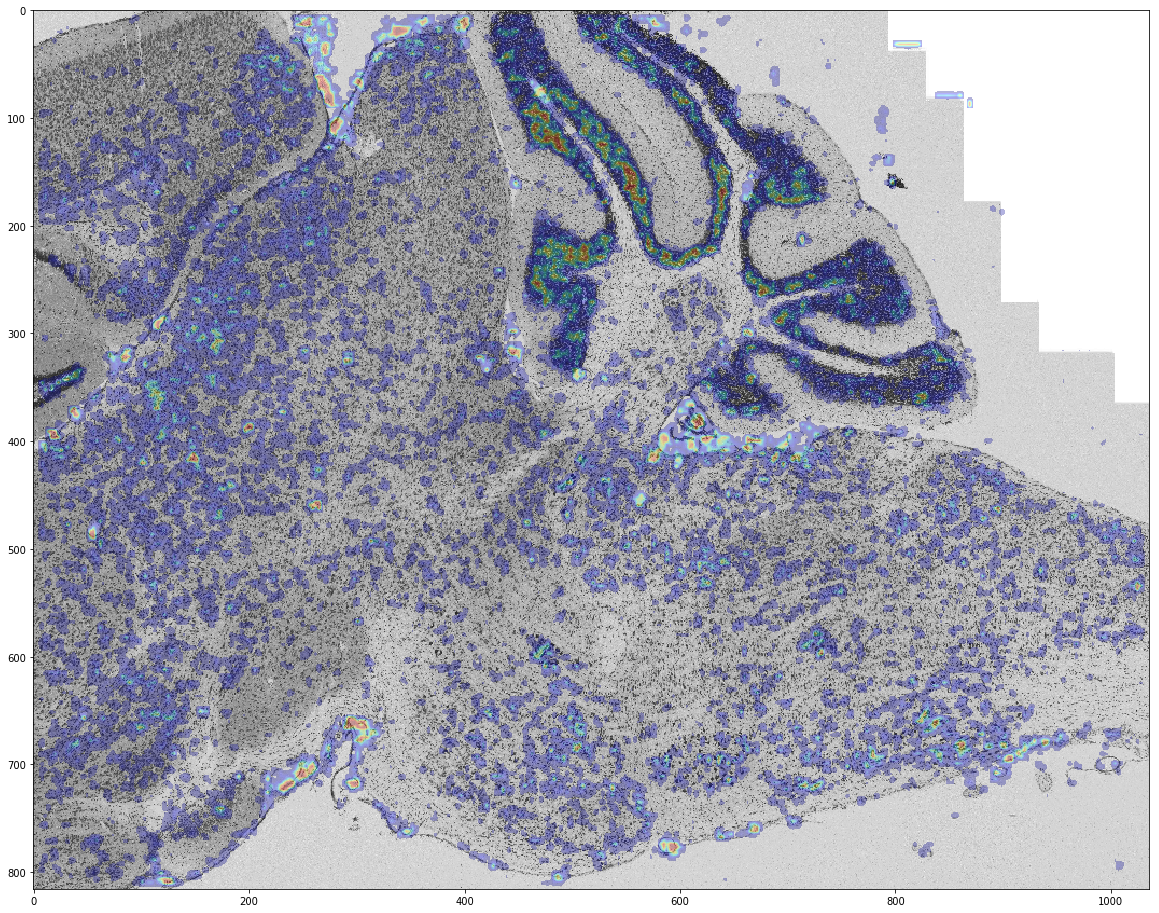

In [37]:
plt.figure(figsize=(20,20));
plt.imshow(viz_all_landmarks['7n']);